In [44]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import math
import matplotlib.style as style
style.use('classic')

In [45]:
torch.manual_seed(111)

In [46]:
DATA_POINTS = 1024
DATA = torch.zeros((DATA_POINTS, 2))
DATA[:, 0] = 2 * math.pi * torch.rand(DATA_POINTS)
DATA[:, 1] = torch.cos(DATA[:, 0])
LABELS = torch.zeros(DATA_POINTS)

In [47]:
train = [(DATA[i], LABELS[i]) for i in range(DATA_POINTS)]

In [48]:
train

[(tensor([ 4.4960, -0.2147]), tensor(0.)),
 (tensor([5.7428, 0.8575]), tensor(0.)),
 (tensor([ 1.7710, -0.1988]), tensor(0.)),
 (tensor([ 1.6217, -0.0509]), tensor(0.)),
 (tensor([ 3.9654, -0.6795]), tensor(0.)),
 (tensor([ 3.7702, -0.8088]), tensor(0.)),
 (tensor([5.8509, 0.9080]), tensor(0.)),
 (tensor([1.3527, 0.2164]), tensor(0.)),
 (tensor([ 3.7905, -0.7967]), tensor(0.)),
 (tensor([ 4.6042, -0.1080]), tensor(0.)),
 (tensor([1.1669, 0.3930]), tensor(0.)),
 (tensor([ 3.2048, -0.9980]), tensor(0.)),
 (tensor([4.7404, 0.0280]), tensor(0.)),
 (tensor([ 1.8120, -0.2389]), tensor(0.)),
 (tensor([ 3.6283, -0.8839]), tensor(0.)),
 (tensor([0.2252, 0.9747]), tensor(0.)),
 (tensor([0.6448, 0.7992]), tensor(0.)),
 (tensor([ 2.1483, -0.5459]), tensor(0.)),
 (tensor([ 2.7645, -0.9297]), tensor(0.)),
 (tensor([ 3.9842, -0.6655]), tensor(0.)),
 (tensor([ 3.9106, -0.7186]), tensor(0.)),
 (tensor([ 3.9801, -0.6686]), tensor(0.)),
 (tensor([5.3908, 0.6276]), tensor(0.)),
 (tensor([0.9877, 0.5506]),

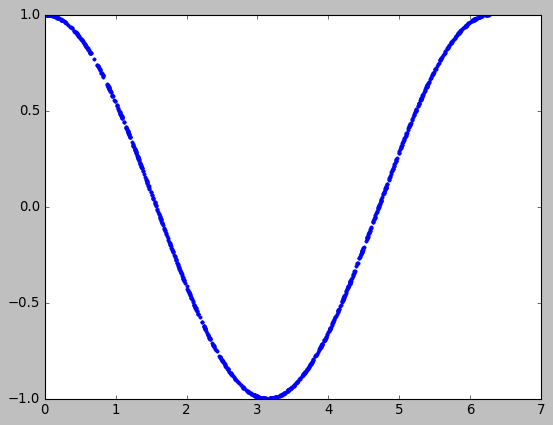

In [49]:
plt.plot(DATA[:, 0], DATA[:, 1], '.')

In [50]:
BATCH = 32
trainLoader = torch.utils.data.DataLoader(
    train,
    batch_size=BATCH,
    shuffle=True
)

In [51]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )
    
    def forward(self, x):
        output = self.model(x)
        return output   

In [52]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
#             nn.Dropout(0.3),
            nn.Linear(16, 32),
            nn.ReLU(),
#             nn.Dropout(0.3),
#             nn.Linear(32, 64),
#             nn.ReLU(),
#             nn.Dropout(0.3),
            nn.Linear(32, 2),
        )
        
    def forward(self, x):
        output = self.model(x)
        return output

In [53]:
discriminator = Discriminator()
generator = Generator()

In [63]:
EPOCHS = 1000
lr = 0.001
LOSS = nn.BCELoss()

In [64]:
dOptimizer = torch.optim.Adam(discriminator.parameters(), lr=lr)
gOptimizer = torch.optim.Adam(generator.parameters(), lr=lr)

In [65]:
D = []
G = []

for e in range(EPOCHS):
    
    for n, (REAL, _) in enumerate(trainLoader):
                
        #data preparations for dicriminator:
        LATENT_SPACE = torch.randn((BATCH, 2))
        REAL_LABELS = torch.ones((BATCH, 1))
        FAKE = generator(LATENT_SPACE)
        FAKE_LABELS = torch.zeros((BATCH, 1))
        ALL = torch.cat((REAL, FAKE))
        ALL_LABELS = torch.cat((REAL_LABELS, FAKE_LABELS))
        
        #D training
        discriminator.zero_grad()
        disOutput = discriminator(ALL)
        disLoss = LOSS(disOutput, ALL_LABELS)
        disLoss.backward()
        dOptimizer.step()
        
        #data preparations for generator:
        LATENT_SPACE = torch.randn((BATCH, 2))
        
        #G training
        generator.zero_grad()
        geneOutput = generator(LATENT_SPACE)
        dgOutput = discriminator(geneOutput)
        geneLoss = LOSS(dgOutput, REAL_LABELS)
        geneLoss.backward()
        gOptimizer.step()
        
        if n == (BATCH - 1) :
            print(f"Epoch: {e} Loss D.: {disLoss}")
            print(f"Epoch: {e} Loss G.: {geneLoss}")
            print('__________________________________________')
            D.append(disLoss)
            G.append(geneLoss)

Epoch: 0 Loss D.: 0.6987611055374146
Epoch: 0 Loss G.: 0.7317312359809875
__________________________________________
Epoch: 1 Loss D.: 0.7623697519302368
Epoch: 1 Loss G.: 0.6233227252960205
__________________________________________
Epoch: 2 Loss D.: 0.6640103459358215
Epoch: 2 Loss G.: 0.6901400089263916
__________________________________________
Epoch: 3 Loss D.: 0.7326362729072571
Epoch: 3 Loss G.: 0.6627616882324219
__________________________________________
Epoch: 4 Loss D.: 0.6951049566268921
Epoch: 4 Loss G.: 0.7649704217910767
__________________________________________
Epoch: 5 Loss D.: 0.6743781566619873
Epoch: 5 Loss G.: 0.9296817183494568
__________________________________________
Epoch: 6 Loss D.: 0.6684538125991821
Epoch: 6 Loss G.: 0.743857741355896
__________________________________________
Epoch: 7 Loss D.: 0.6424619555473328
Epoch: 7 Loss G.: 0.7998023629188538
__________________________________________
Epoch: 8 Loss D.: 0.7017050981521606
Epoch: 8 Loss G.: 0.66119360

Epoch: 70 Loss D.: 0.4816730320453644
Epoch: 70 Loss G.: 1.2351008653640747
__________________________________________
Epoch: 71 Loss D.: 0.6049072742462158
Epoch: 71 Loss G.: 1.119434118270874
__________________________________________
Epoch: 72 Loss D.: 0.6078724265098572
Epoch: 72 Loss G.: 0.8584539890289307
__________________________________________
Epoch: 73 Loss D.: 0.6187933683395386
Epoch: 73 Loss G.: 0.825207531452179
__________________________________________
Epoch: 74 Loss D.: 0.7238188982009888
Epoch: 74 Loss G.: 0.7031664848327637
__________________________________________
Epoch: 75 Loss D.: 0.6458799839019775
Epoch: 75 Loss G.: 1.046302318572998
__________________________________________
Epoch: 76 Loss D.: 0.6347268223762512
Epoch: 76 Loss G.: 0.746280312538147
__________________________________________
Epoch: 77 Loss D.: 0.7053349614143372
Epoch: 77 Loss G.: 0.7108992338180542
__________________________________________
Epoch: 78 Loss D.: 0.6630377173423767
Epoch: 78 Loss

Epoch: 139 Loss D.: 0.6787669658660889
Epoch: 139 Loss G.: 0.7271252870559692
__________________________________________
Epoch: 140 Loss D.: 0.6636383533477783
Epoch: 140 Loss G.: 0.715754508972168
__________________________________________
Epoch: 141 Loss D.: 0.7217798829078674
Epoch: 141 Loss G.: 0.7230879068374634
__________________________________________
Epoch: 142 Loss D.: 0.7070263028144836
Epoch: 142 Loss G.: 0.7690719366073608
__________________________________________
Epoch: 143 Loss D.: 0.6417509317398071
Epoch: 143 Loss G.: 0.7779095768928528
__________________________________________
Epoch: 144 Loss D.: 0.6931073069572449
Epoch: 144 Loss G.: 0.7144498229026794
__________________________________________
Epoch: 145 Loss D.: 0.6681039333343506
Epoch: 145 Loss G.: 0.7395020723342896
__________________________________________
Epoch: 146 Loss D.: 0.667548418045044
Epoch: 146 Loss G.: 0.7373718023300171
__________________________________________
Epoch: 147 Loss D.: 0.669879972934

Epoch: 207 Loss D.: 0.709760844707489
Epoch: 207 Loss G.: 0.718334972858429
__________________________________________
Epoch: 208 Loss D.: 0.677153468132019
Epoch: 208 Loss G.: 0.7210339307785034
__________________________________________
Epoch: 209 Loss D.: 0.6877449154853821
Epoch: 209 Loss G.: 0.7166538238525391
__________________________________________
Epoch: 210 Loss D.: 0.6889397501945496
Epoch: 210 Loss G.: 0.7361395955085754
__________________________________________
Epoch: 211 Loss D.: 0.6852254271507263
Epoch: 211 Loss G.: 0.7962149977684021
__________________________________________
Epoch: 212 Loss D.: 0.6566503643989563
Epoch: 212 Loss G.: 0.7391200065612793
__________________________________________
Epoch: 213 Loss D.: 0.6884571313858032
Epoch: 213 Loss G.: 0.7304418087005615
__________________________________________
Epoch: 214 Loss D.: 0.6955454349517822
Epoch: 214 Loss G.: 0.7315648198127747
__________________________________________
Epoch: 215 Loss D.: 0.6712939143180

Epoch: 275 Loss D.: 0.7028990387916565
Epoch: 275 Loss G.: 0.7440419793128967
__________________________________________
Epoch: 276 Loss D.: 0.6843798160552979
Epoch: 276 Loss G.: 0.82197105884552
__________________________________________
Epoch: 277 Loss D.: 0.694161593914032
Epoch: 277 Loss G.: 0.745378315448761
__________________________________________
Epoch: 278 Loss D.: 0.7250836491584778
Epoch: 278 Loss G.: 0.6601576209068298
__________________________________________
Epoch: 279 Loss D.: 0.6842709183692932
Epoch: 279 Loss G.: 0.8637521862983704
__________________________________________
Epoch: 280 Loss D.: 0.6750319600105286
Epoch: 280 Loss G.: 0.7834410667419434
__________________________________________
Epoch: 281 Loss D.: 0.6739553213119507
Epoch: 281 Loss G.: 0.7766438126564026
__________________________________________
Epoch: 282 Loss D.: 0.719751238822937
Epoch: 282 Loss G.: 0.6263918876647949
__________________________________________
Epoch: 283 Loss D.: 0.683674275875091

Epoch: 343 Loss D.: 0.7475440502166748
Epoch: 343 Loss G.: 0.6633052229881287
__________________________________________
Epoch: 344 Loss D.: 0.7008887529373169
Epoch: 344 Loss G.: 0.7663881182670593
__________________________________________
Epoch: 345 Loss D.: 0.6269493103027344
Epoch: 345 Loss G.: 0.6761475801467896
__________________________________________
Epoch: 346 Loss D.: 0.7049974799156189
Epoch: 346 Loss G.: 0.7401699423789978
__________________________________________
Epoch: 347 Loss D.: 0.6622077822685242
Epoch: 347 Loss G.: 0.7053619623184204
__________________________________________
Epoch: 348 Loss D.: 0.6797705888748169
Epoch: 348 Loss G.: 0.7552364468574524
__________________________________________
Epoch: 349 Loss D.: 0.6508954167366028
Epoch: 349 Loss G.: 0.6939250230789185
__________________________________________
Epoch: 350 Loss D.: 0.7053664326667786
Epoch: 350 Loss G.: 0.6966835260391235
__________________________________________
Epoch: 351 Loss D.: 0.6903836727

Epoch: 411 Loss D.: 0.6049382090568542
Epoch: 411 Loss G.: 0.9362598061561584
__________________________________________
Epoch: 412 Loss D.: 0.47554150223731995
Epoch: 412 Loss G.: 0.8638192415237427
__________________________________________
Epoch: 413 Loss D.: 0.7645412683486938
Epoch: 413 Loss G.: 0.6947120428085327
__________________________________________
Epoch: 414 Loss D.: 0.7275512218475342
Epoch: 414 Loss G.: 0.7319029569625854
__________________________________________
Epoch: 415 Loss D.: 0.5982282757759094
Epoch: 415 Loss G.: 0.9407007694244385
__________________________________________
Epoch: 416 Loss D.: 0.6733056306838989
Epoch: 416 Loss G.: 0.7254394292831421
__________________________________________
Epoch: 417 Loss D.: 0.6886510252952576
Epoch: 417 Loss G.: 0.8173468708992004
__________________________________________
Epoch: 418 Loss D.: 0.6827764511108398
Epoch: 418 Loss G.: 0.7133326530456543
__________________________________________
Epoch: 419 Loss D.: 0.666958391

Epoch: 479 Loss D.: 0.7003258466720581
Epoch: 479 Loss G.: 0.8861193060874939
__________________________________________
Epoch: 480 Loss D.: 0.711182713508606
Epoch: 480 Loss G.: 0.6817492842674255
__________________________________________
Epoch: 481 Loss D.: 0.6469851732254028
Epoch: 481 Loss G.: 0.8493064641952515
__________________________________________
Epoch: 482 Loss D.: 0.7043353319168091
Epoch: 482 Loss G.: 0.6880394220352173
__________________________________________
Epoch: 483 Loss D.: 0.6085490584373474
Epoch: 483 Loss G.: 0.7244746088981628
__________________________________________
Epoch: 484 Loss D.: 0.5551178455352783
Epoch: 484 Loss G.: 1.3691086769104004
__________________________________________
Epoch: 485 Loss D.: 0.46119165420532227
Epoch: 485 Loss G.: 1.3849321603775024
__________________________________________
Epoch: 486 Loss D.: 0.5472472310066223
Epoch: 486 Loss G.: 1.2399444580078125
__________________________________________
Epoch: 487 Loss D.: 0.5955868959

Epoch: 547 Loss D.: 0.6628940105438232
Epoch: 547 Loss G.: 0.7529171705245972
__________________________________________
Epoch: 548 Loss D.: 0.6787372827529907
Epoch: 548 Loss G.: 0.6825605034828186
__________________________________________
Epoch: 549 Loss D.: 0.7018938064575195
Epoch: 549 Loss G.: 0.731137752532959
__________________________________________
Epoch: 550 Loss D.: 0.6828824877738953
Epoch: 550 Loss G.: 0.7856525778770447
__________________________________________
Epoch: 551 Loss D.: 0.6728793382644653
Epoch: 551 Loss G.: 0.711951732635498
__________________________________________
Epoch: 552 Loss D.: 0.6937836408615112
Epoch: 552 Loss G.: 0.6854252815246582
__________________________________________
Epoch: 553 Loss D.: 0.6752971410751343
Epoch: 553 Loss G.: 0.7263997197151184
__________________________________________
Epoch: 554 Loss D.: 0.6790323257446289
Epoch: 554 Loss G.: 0.708083987236023
__________________________________________
Epoch: 555 Loss D.: 0.6848543286323

Epoch: 615 Loss D.: 0.7755448222160339
Epoch: 615 Loss G.: 0.6996926665306091
__________________________________________
Epoch: 616 Loss D.: 0.6704872250556946
Epoch: 616 Loss G.: 0.7264601588249207
__________________________________________
Epoch: 617 Loss D.: 0.7182559370994568
Epoch: 617 Loss G.: 0.704527735710144
__________________________________________
Epoch: 618 Loss D.: 0.682595431804657
Epoch: 618 Loss G.: 0.722365140914917
__________________________________________
Epoch: 619 Loss D.: 0.6903061866760254
Epoch: 619 Loss G.: 0.7167230248451233
__________________________________________
Epoch: 620 Loss D.: 0.6840231418609619
Epoch: 620 Loss G.: 0.7148265838623047
__________________________________________
Epoch: 621 Loss D.: 0.6894409656524658
Epoch: 621 Loss G.: 0.747646152973175
__________________________________________
Epoch: 622 Loss D.: 0.691667914390564
Epoch: 622 Loss G.: 0.7224115133285522
__________________________________________
Epoch: 623 Loss D.: 0.707147002220153

Epoch: 683 Loss D.: 0.6875477433204651
Epoch: 683 Loss G.: 0.7112335562705994
__________________________________________
Epoch: 684 Loss D.: 0.688500165939331
Epoch: 684 Loss G.: 0.7115809321403503
__________________________________________
Epoch: 685 Loss D.: 0.7010970711708069
Epoch: 685 Loss G.: 0.6983660459518433
__________________________________________
Epoch: 686 Loss D.: 0.6946432590484619
Epoch: 686 Loss G.: 0.7047250270843506
__________________________________________
Epoch: 687 Loss D.: 0.6888827085494995
Epoch: 687 Loss G.: 0.7686729431152344
__________________________________________
Epoch: 688 Loss D.: 0.6857284903526306
Epoch: 688 Loss G.: 0.7073718905448914
__________________________________________
Epoch: 689 Loss D.: 0.6972528100013733
Epoch: 689 Loss G.: 0.708734929561615
__________________________________________
Epoch: 690 Loss D.: 0.7065495848655701
Epoch: 690 Loss G.: 0.7052668929100037
__________________________________________
Epoch: 691 Loss D.: 0.693145811557

Epoch: 751 Loss D.: 0.6844947934150696
Epoch: 751 Loss G.: 0.7221376299858093
__________________________________________
Epoch: 752 Loss D.: 0.7033728361129761
Epoch: 752 Loss G.: 0.7199615240097046
__________________________________________
Epoch: 753 Loss D.: 0.70082026720047
Epoch: 753 Loss G.: 0.7105461955070496
__________________________________________
Epoch: 754 Loss D.: 0.6916950941085815
Epoch: 754 Loss G.: 0.7190042734146118
__________________________________________
Epoch: 755 Loss D.: 0.7034287452697754
Epoch: 755 Loss G.: 0.6908516883850098
__________________________________________
Epoch: 756 Loss D.: 0.6872260570526123
Epoch: 756 Loss G.: 0.6999063491821289
__________________________________________
Epoch: 757 Loss D.: 0.6904405355453491
Epoch: 757 Loss G.: 0.7408284544944763
__________________________________________
Epoch: 758 Loss D.: 0.681078314781189
Epoch: 758 Loss G.: 0.7157155275344849
__________________________________________
Epoch: 759 Loss D.: 0.6747735738754

Epoch: 819 Loss D.: 0.6537849307060242
Epoch: 819 Loss G.: 0.7254551649093628
__________________________________________
Epoch: 820 Loss D.: 0.6823912858963013
Epoch: 820 Loss G.: 0.7206789255142212
__________________________________________
Epoch: 821 Loss D.: 0.6805635690689087
Epoch: 821 Loss G.: 0.7289353609085083
__________________________________________
Epoch: 822 Loss D.: 0.6682022213935852
Epoch: 822 Loss G.: 0.7331497669219971
__________________________________________
Epoch: 823 Loss D.: 0.6609441041946411
Epoch: 823 Loss G.: 0.8037300109863281
__________________________________________
Epoch: 824 Loss D.: 0.6619643568992615
Epoch: 824 Loss G.: 0.7625687718391418
__________________________________________
Epoch: 825 Loss D.: 0.6519548296928406
Epoch: 825 Loss G.: 0.7433117628097534
__________________________________________
Epoch: 826 Loss D.: 0.6851599812507629
Epoch: 826 Loss G.: 0.7316109538078308
__________________________________________
Epoch: 827 Loss D.: 0.6999201774

Epoch: 887 Loss D.: 0.6940449476242065
Epoch: 887 Loss G.: 0.721988320350647
__________________________________________
Epoch: 888 Loss D.: 0.6996866464614868
Epoch: 888 Loss G.: 0.7059800028800964
__________________________________________
Epoch: 889 Loss D.: 0.6886573433876038
Epoch: 889 Loss G.: 0.7006783485412598
__________________________________________
Epoch: 890 Loss D.: 0.6684056520462036
Epoch: 890 Loss G.: 0.6850661039352417
__________________________________________
Epoch: 891 Loss D.: 0.6874321103096008
Epoch: 891 Loss G.: 0.7158192992210388
__________________________________________
Epoch: 892 Loss D.: 0.691453218460083
Epoch: 892 Loss G.: 0.707827627658844
__________________________________________
Epoch: 893 Loss D.: 0.6919918060302734
Epoch: 893 Loss G.: 0.7065342664718628
__________________________________________
Epoch: 894 Loss D.: 0.6762310862541199
Epoch: 894 Loss G.: 0.6886235475540161
__________________________________________
Epoch: 895 Loss D.: 0.6928623318672

Epoch: 955 Loss D.: 0.6891267895698547
Epoch: 955 Loss G.: 0.6906790733337402
__________________________________________
Epoch: 956 Loss D.: 0.655410885810852
Epoch: 956 Loss G.: 0.6735783219337463
__________________________________________
Epoch: 957 Loss D.: 0.6128127574920654
Epoch: 957 Loss G.: 0.7245246171951294
__________________________________________
Epoch: 958 Loss D.: 0.6402323246002197
Epoch: 958 Loss G.: 0.7585536241531372
__________________________________________
Epoch: 959 Loss D.: 0.5907418727874756
Epoch: 959 Loss G.: 0.9326744675636292
__________________________________________
Epoch: 960 Loss D.: 0.6752281785011292
Epoch: 960 Loss G.: 0.7849215269088745
__________________________________________
Epoch: 961 Loss D.: 0.6395379304885864
Epoch: 961 Loss G.: 0.7498934268951416
__________________________________________
Epoch: 962 Loss D.: 0.677321195602417
Epoch: 962 Loss G.: 0.7288225293159485
__________________________________________
Epoch: 963 Loss D.: 0.636122763156

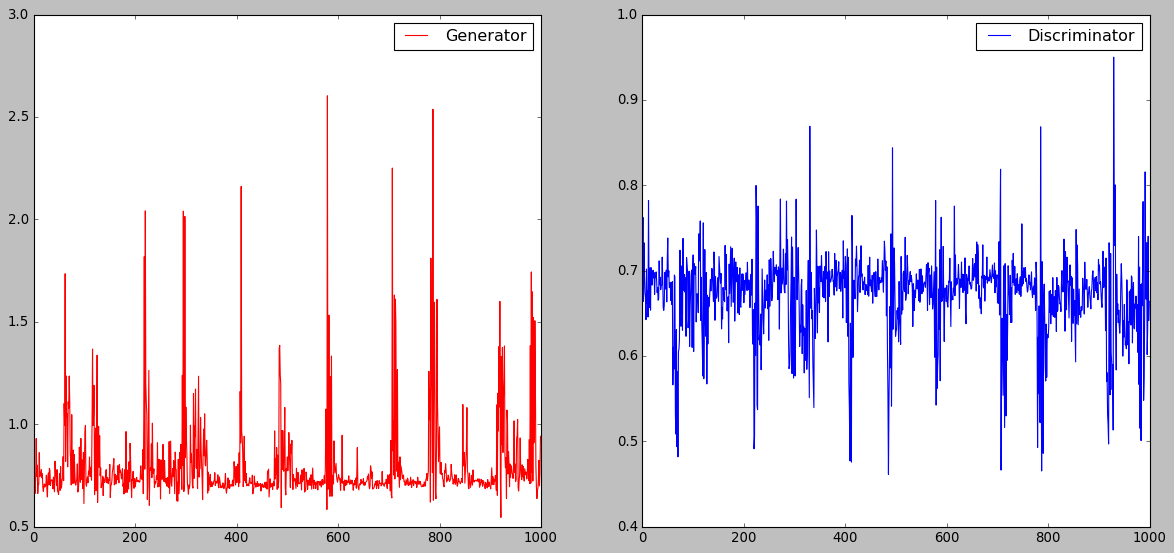

In [67]:
fig = plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
plt.plot(list(range(len(G))), G, label='Generator', color='red')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(list(range(len(D))), D, label='Discriminator')
plt.legend()

plt.show()

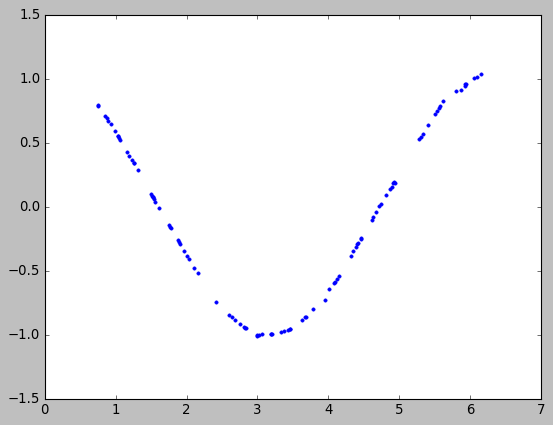

In [74]:
random = torch.randn(100, 2)
generated_samples = generator(random)

generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")